In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

# Part1:
## Defining fundamental flows:
## Fundamental Flows:
$ \vec{V} = Velocity $
$ \\ \phi = Velocity\ Potential$
$ \\ \psi = Stream\ Function$
### Uniform Flow:
$ Flow\ at\ angle\ \alpha\ to\ x\ axis. $
$ \\\vec{V} = U(\cos(\alpha)\ \hat{i} + \sin(\alpha)\ \hat{j}) $
$ \\ \phi = U\cos(\alpha)x + U\sin(\alpha)y $
$ \\ \psi = U\sin(\alpha)x + U\cos(\alpha)y $
### Source or Sink Flow:
$ \vec{V} = \kappa\hat{e_{r}} $
$ \\ \phi = \kappa\ln{r} $
$ \\ \psi = \kappa\theta $
$ \\ \kappa = Strength\ of\ source\ or\ sink $
$ \\For\ source\ flow,\ \kappa\ is\ negative\ while\ for\ sink\ flow\ \kappa\ is\ positive.  $
### Free Vortex Flow:
$ \vec{V} = \frac{\tau}{2\pi\\r} \hat{e_{\theta}} $
$ \\ \phi = \frac{\tau}{2\pi}\theta $
$ \\ \psi = -\frac{\tau}{2\pi}\ln{r} $
$ \\ \tau = Circulation $

In [3]:
# Unfiform Flow
class uf:
  # velocity potential
  vp = lambda _x,_y,U=1,alpha=0: U*_x*np.cos(alpha) + U*_y*np.sin(alpha)
  # stream function
  sf = lambda _x,_y,U=1,alpha=0: U*_y*np.cos(alpha) + U*_y*np.sin(alpha)

# Source(+ve strength) Flow or Sink(-ve strength) Flow
class src_sink:
  # velocity potential
  vp = lambda _x,_y,K=1: (K/2)*np.log(_x**2+_y**2)
  # stream function
  sf = lambda _x,_y,K=1: K*np.arctan(_y/_x)

# Free Vortex Flow
class vortex:
  # velocity potential
  vp = lambda _x,_y,T=1: T*np.arctan(_y/_x)/(2*np.pi)
  # stream function
  sf = lambda _x,_y,T=1: -1*T*np.log(_x**2+_y**2)/(2*np.pi)

## Defining complex potential function and transformation:
$ Complex\ potential\ function\ is, $
$ F(Z) = \phi + \psi\ i $
$ \\ Since\ we\ are\ using\ Joukowski\ Transformation, $
$ \xi\{Z\} = Z + \frac{1}{Z} $

In [4]:
# complex potential
z = lambda _x,_y: vp(_x,_y) + 1j*sf(_x,_y)

# transformation of complex velocity
t = lambda c: (c + 1/c)

# Part 2:
## Now plotting the Flow

In [11]:
# define velocity potential and stream function from fundamental flows
vp = lambda _x,_y: (src_sink.vp(_x-.1,_y,-.1) + src_sink.vp(_x+.1,_y,.1) + uf.vp(_x,_y) + vortex.vp(_x,_y,-1))
sf = lambda _x,_y: (src_sink.sf(_x-.1,_y,-.1) + src_sink.sf(_x+.1,_y,.1) + uf.sf(_x,_y) + vortex.sf(_x,_y,-1))

# generate coordinates and meshgrid
x = y = np.linspace(-1,1,100)
x, y = np.meshgrid(x,y)

# generate coordinates and meshgrid for cylinder
xc = np.linspace(-0.25,0.25,150)
yc = np.sqrt(np.ones(xc.size)*(.25**2) - xc**2)
yc = np.array([((-1)**i)*yc[i] for i in range(yc.size)])
tc = t(xc+1j*yc)

# generate complex potential array and velocity array meshgrid for V
Za = z(x, y)
# complex differentiate complex potential to genrate complex velocity
c_diff = (x[1:, 1:] - x[:-1, :-1]) + 1j*(y[1:, 1:] - y[:-1, :-1])
Va = (Za[1:, 1:] - Za[:-1, :-1]) / c_diff
Vr , Vi = Va.real, -1*Va.imag

# generate transformation array for complex potential and meshgrid for transformation
Ta = t(Va)
Tr , Ti = Ta.real, -Ta.imag

# remodulate x, y to fit mesh of velocity
x, y = x[1:, 1:], y[1:, 1:]

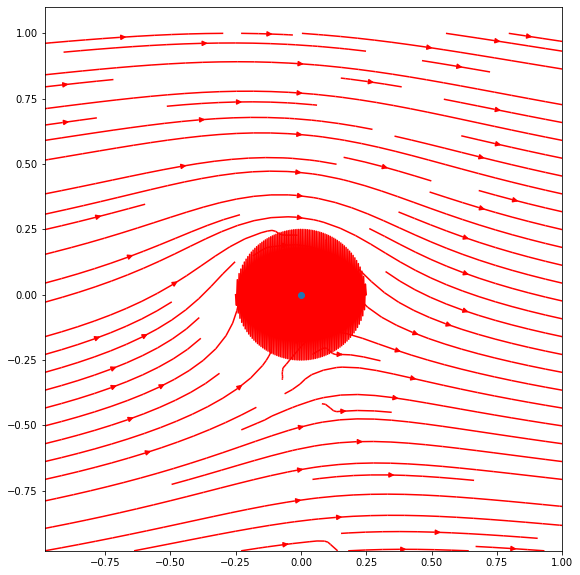

In [12]:
plt.figure(figsize=(10,10))
plt.streamplot(x, y, Vr, Vi, color='red')
plt.plot(xc, yc, color='red')
plt.axis("scaled")
plt.plot(0, 0, 'o')

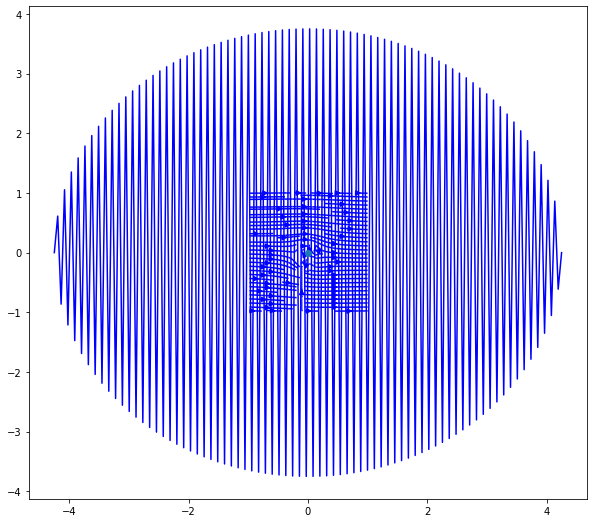

In [13]:
# plt.figure(figsize=(10,10))
# plt.streamplot(x, y, Tr, Ti, color='blue')
# plt.plot(tc.real, tc.imag, color='blue')
# plt.axis("scaled")
# plt.plot(0, 0, 'o')
